### APS1070 Project 1 --- Basic Principles and Models
**Deadline: May 24th, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: **Gang Xiao** *(here and elsewhere, please replace the underscore with your answer)*

Student ID: **1005244200**

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).


### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858


# Project 1 [10 Marks]
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with the [graduate admissions dataset](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions). The dataset lists estimates of the chance of admission determined by several important parameters for a number of graduate school admissions decisions.


Download it using the cells below:

In [1]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [2]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/Admission_predict.csv')

'Admission_predict (1).csv'

## Part 1: Getting started [2.5 Marks]
First off, load the dataset in CSV file using Pandas and name it `df`. The dataset is called `Admission_predict.csv`. Reset the indices list of the DataFrame, and delete the `Serial No.` column. Print out the first few rows of the dataset, and take a look at the features data and the target columns. **[0.4]**

* How many features do we have in this dataset? **8**
* Determine the median target value. **0.72**
* How many individuals have a target value greater than the median target value? **248**


Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as the individuals with a chance of admission below median or the individuals with a chance of admission above median. **[0.5]**

In [3]:
import pandas as pd
df=pd.read_csv('Admission_predict.csv')
df.drop('Serial No.',axis=1,inplace=True)
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,target
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
df.shape

(500, 8)

In [5]:
median_value=df.target.median()
greater_median=[i>median_value for i in df.target]
sum(greater_median)

248

In [6]:
#add new target
df['binary_target']=(df.target>median_value).astype(int)
df=df.drop('target',axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,binary_target
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,1


In [7]:
#split data
from sklearn.model_selection import train_test_split
x=df.drop('binary_target',axis=1)
y=df.binary_target
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

/Users/gangxiao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


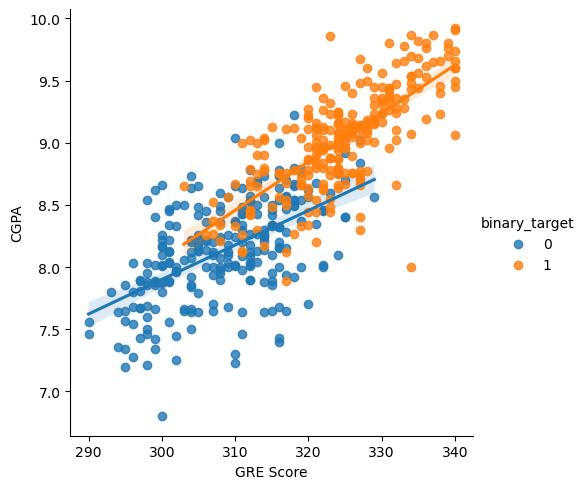

In [9]:
#draw a plot where the x-axis is the GRE Score, and the y-axis is cgpa
import seaborn as sns 
sns.lmplot(df,x='GRE Score',y='CGPA',hue='binary_target')

both part in the plot show that as gre grow, the cgpa is increase.and we can still find out that the part who are higher than median have hugher Cgpa.

In [13]:
#use standardization to check
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
df_scale=scale.fit_transform(df)
df_scale_data=pd.DataFrame(df_scale,columns=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research','binary_target'])
df_scale_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,binary_target
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.008032
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,1.008032
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.992032
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,1.008032
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.992032
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.008032
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.008032
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.008032
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,1.008032


/Users/gangxiao/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


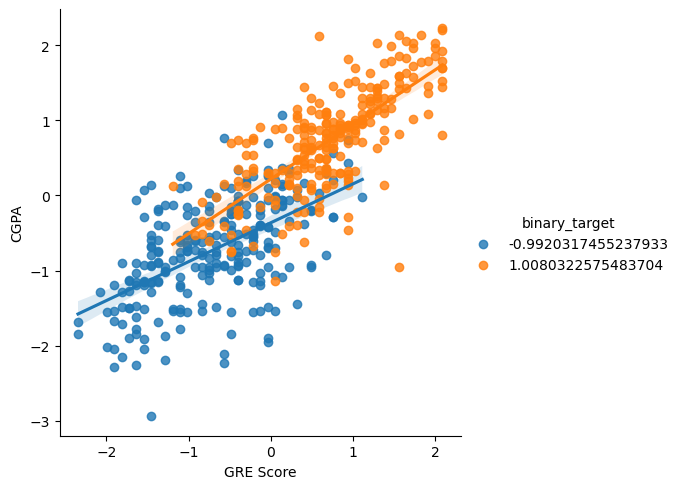

In [15]:
sns.lmplot(df_scale_data,x='GRE Score',y='CGPA',hue='binary_target')

In [ ]:
''''''''''
    from two plot above, we find out that there no much different between
    original and standradization data.

In [ ]:
#use KNN on original def clean_FIELD(self):
from sklearn.model_selection import cross_validate
from sklearn import neighbors
import matplotlib.pyplot as plt
k_values=range(1,101)
mean_cross_validation_accuract=[]
for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores= cross_validate(knn,X_train,y_train,cv=5,return_train_score=True)
    